In [20]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = nx.Graph()

graph.add_edge("A", "B", weight = 6, relation = "friend")
graph.add_edge("A", "D", weight = 4.2, relation = "foe")

In [6]:
# get info about the edges

graph.edges()

EdgeView([('A', 'B'), ('A', 'D')])

In [7]:
# get info about the edges and edge attributes
# these edge attributes are returned in a dict

graph.edges(data = True)

EdgeDataView([('A', 'B', {'weight': 6, 'relation': 'friend'}), ('A', 'D', {'weight': 4.2, 'relation': 'foe'})])

In [10]:
graph.edges(data = "weight")

EdgeDataView([('A', 'B', 6), ('A', 'D', 4.2)])

In [11]:
graph.edges(data = "relation")

EdgeDataView([('A', 'B', 'friend'), ('A', 'D', 'foe')])

In [13]:
# this is okay as long as you are working with small networks
# but when the network gets larger you would not want to list the attributes of all nodes
# we can access the attributes of certain nodes like this:

graph.edges["A", "B"]

{'weight': 6, 'relation': 'friend'}

In [17]:
# the order of args does not matter as long as the graph is an undirected graph

graph.edges["B", "A"]

{'weight': 6, 'relation': 'friend'}

In [18]:
graph.edges["A", "B"].get("relation")

'friend'

In [19]:
dir_graph = nx.DiGraph()

dir_graph.add_edge("A", "B", weight = 12.75, relation = "foe", sign = "+")
dir_graph.add_edge("A", "C", weight = 2.5, relation = "feiend", sign = "-")
dir_graph.add_edge("C", "B", weight = 1.75, relation = "family", sign = "-")

In [21]:
dir_graph.edges()

OutEdgeView([('A', 'B'), ('A', 'C'), ('C', 'B')])

In [22]:
dir_graph.edges(data = True)

OutEdgeDataView([('A', 'B', {'weight': 12.75, 'relation': 'foe', 'sign': '+'}), ('A', 'C', {'weight': 2.5, 'relation': 'feiend', 'sign': '-'}), ('C', 'B', {'weight': 1.75, 'relation': 'family', 'sign': '-'})])

In [23]:
dir_graph.edges(data = "sign")

OutEdgeDataView([('A', 'B', '+'), ('A', 'C', '-'), ('C', 'B', '-')])

In [24]:
dir_graph.edges(data = "weight")

OutEdgeDataView([('A', 'B', 12.75), ('A', 'C', 2.5), ('C', 'B', 1.75)])

In [26]:
# A -> B
dir_graph.edges["A", "B"]

{'weight': 12.75, 'relation': 'foe', 'sign': '+'}

In [28]:
# B -> A
# since this is a directed graph, this will throw an error
dir_graph.edges["B", "A"]

KeyError: 'A'

In [34]:
dir_graph.edges["C", "B"].get("sign")

'-'

In [35]:
dir_graph.edges["C", "B"].get("weight")

1.75

## ***Multi graphs***

In [55]:
# multi graphs are used to represent where two nodes are connected by more than 1 edge!
# undirected multi graph

multi = nx.MultiGraph()

multi.add_edge("A", "B", weight = 3.4125, relation = "family")
multi.add_edge("A", "B", weight = 32.45, relation = "friend")
multi.add_edge("A", "B", weight = 1.25, relation = "foe")
multi.add_edge("A", "C", weight = 3.5, relation = "colleague")

0

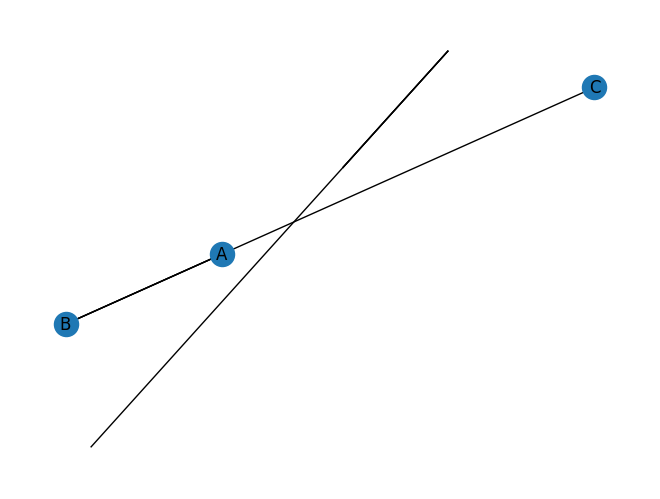

In [83]:
nx.draw(multi, with_labels = True)
nx.draw_networkx_edges(multi, pos = nx.spring_layout(multi),
                           label = nx.get_edge_attributes(multi, name = "weight"));

In [73]:
# accessing node attributes in a multi graph
# gives a view of all attributes of edges related to node A
multi["A"] 

AdjacencyView({'B': {0: {'weight': 3.4125, 'relation': 'family'}, 1: {'weight': 32.45, 'relation': 'friend'}, 2: {'weight': 1.25, 'relation': 'foe'}}, 'C': {0: {'weight': 3.5, 'relation': 'colleague'}}})

In [74]:
multi["C"]

AdjacencyView({'A': {0: {'weight': 3.5, 'relation': 'colleague'}}})

In [76]:
# gives the attrs of all edges associated with A & B
multi["A"]["B"]

AtlasView({0: {'weight': 3.4125, 'relation': 'family'}, 1: {'weight': 32.45, 'relation': 'friend'}, 2: {'weight': 1.25, 'relation': 'foe'}})

In [78]:
# gives the attrs of the 1st edges associated with A & B
multi["A"]["B"].get(0)

{'weight': 3.4125, 'relation': 'family'}

In [79]:
multi["A"]["B"].get(0).get("weight")

3.4125

In [2]:
dgraph = nx.DiGraph()

dgraph.add_edge("A", "C", weight = 1.76, relation = "employer")
dgraph.add_edge("B", "C", weight = 107.6, relation = "parent")
dgraph.add_edge("A", "B", weight = 0.76, relation = "husband")

In [4]:
dgraph.edges()

OutEdgeView([('A', 'C'), ('A', 'B'), ('B', 'C')])

In [5]:
dgraph.edges(data = True)

OutEdgeDataView([('A', 'C', {'weight': 1.76, 'relation': 'employer'}), ('A', 'B', {'weight': 0.76, 'relation': 'husband'}), ('B', 'C', {'weight': 107.6, 'relation': 'parent'})])

In [7]:
dgraph["A"]

AtlasView({'C': {'weight': 1.76, 'relation': 'employer'}, 'B': {'weight': 0.76, 'relation': 'husband'}})

In [9]:
dgraph["A"].get("C")

{'weight': 1.76, 'relation': 'employer'}

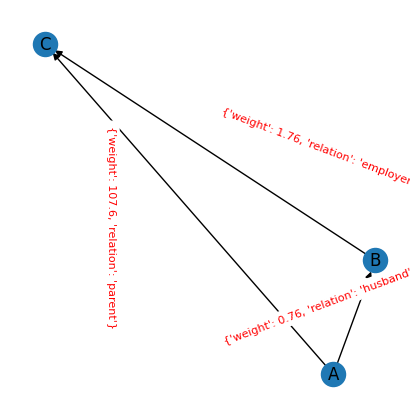

In [88]:
plt.rcParams["figure.figsize"] = (4, 4)
positions = nx.circular_layout(dgraph)

nx.draw(dgraph, with_labels = True)
nx.draw_networkx_edge_labels(dgraph, pos = positions, font_size = 8, font_color = "red")
plt.show()

In [123]:
mdgraph = nx.MultiDiGraph()

mdgraph.add_edge("A", "B", relation = "friend", weight = 2.87)
mdgraph.add_edge("A", "B", relation = "partner", weight = 5.87)
mdgraph.add_edge("D", "B", relation = "father", weight = 28.7)
mdgraph.add_edge("C", "A", relation = "mother", weight = 72.87)
mdgraph.add_edge("C", "D", relation = "friend", weight = 545.87)

positions = nx.circular_layout(mdgraph)

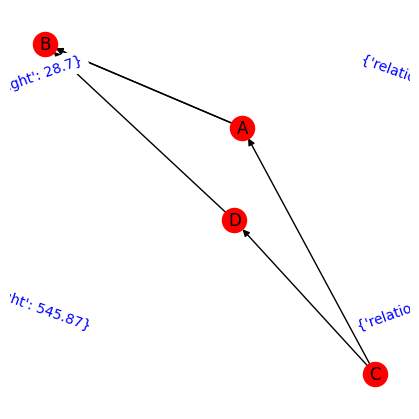

In [124]:
nx.draw(mdgraph, with_labels = True, node_color = "red")
nx.draw_networkx_edge_labels(mdgraph, pos = positions, font_color = "blue", font_size = 10)
plt.show()

In [125]:
mdgraph["A"]

AdjacencyView({'B': {0: {'relation': 'friend', 'weight': 2.87}, 1: {'relation': 'partner', 'weight': 5.87}}})

In [126]:
# as edges having attributes nodes can aslo have attributes
# for example, consider a network in a workspace
# every node will hold a position e.g. manager, cleaner, janitor, ceo and what not

In [127]:
graph = nx.DiGraph()

graph.add_edge("Jamie", "Julian", relation = "Assistant")
graph.add_edge("Rose", "Julian", relation = "Supervisor")
graph.add_edge("Jane", "Vivian", relation = "Mentor")
graph.add_edge("Jamie", "Natalie", relation = "Co-Worker")
graph.add_edge("Nathan", "Brad", relation = "Project-Manager")


In [141]:
positions = nx.circular_layout(graph)

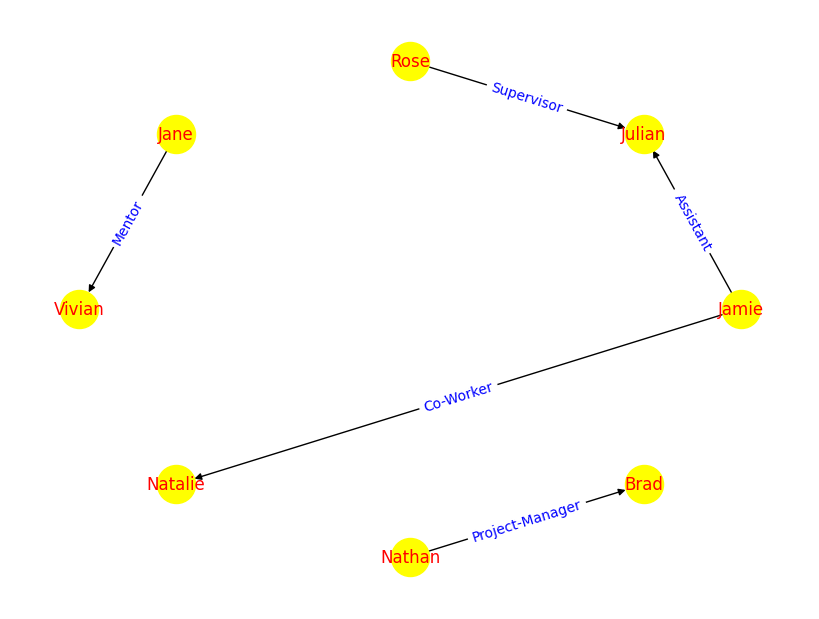

In [170]:
plt.rcParams["figure.figsize"] = 8, 6
nx.draw(graph, with_labels = True, node_color = "yellow", font_color = "red", node_size = 750, pos = positions)
nx.draw_networkx_edge_labels(graph, pos = positions, font_color = "blue", edge_labels = nx.get_edge_attributes(graph, "relation"))
plt.show()

In [171]:
dgraph = nx.DiGraph()

dgraph.add_edge("Natalie", "Portman", relationship = "father")
dgraph.add_edge("Natalie", "Cameroon", relationship = "step-father")
dgraph.add_edge("Natalie", "Jacob", relationship = "husband")
dgraph.add_edge("Natalie", "Julia", relationship = "sister")
dgraph.add_edge("Natalie", "Rose", relationship = "mother")
dgraph.add_edge("Natalie", "Leslie", relationship = "friend")
dgraph.add_edge("Natalie", "Camilia", relationship = "colleague")

positions = nx.circular_layout(dgraph)

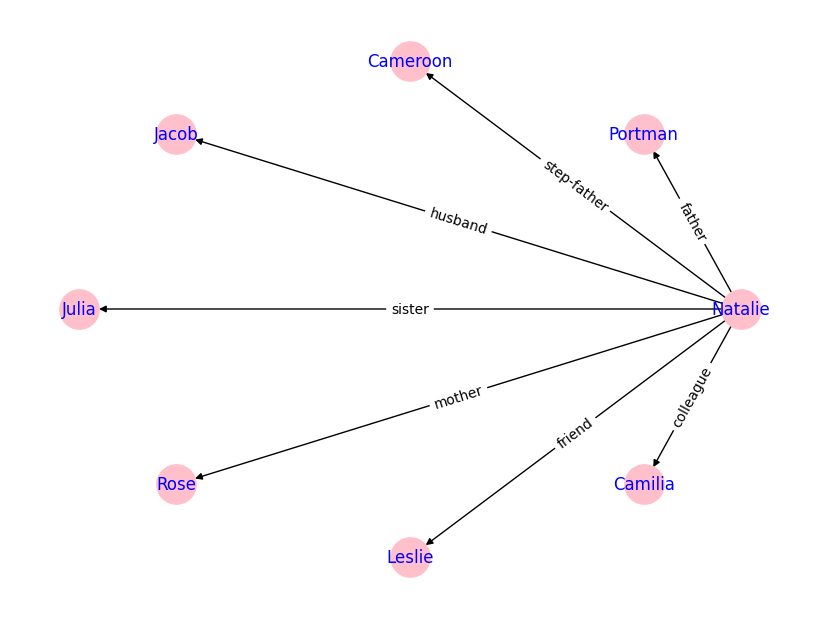

In [178]:
nx.draw(dgraph, with_labels = True, node_color = "pink", node_size = 800, pos = positions, font_color = "blue")
nx.draw_networkx_edge_labels(dgraph, pos = positions, edge_labels = nx.get_edge_attributes(dgraph, "relationship"))
plt.show()